In [1]:
import pandas as pd
import codecs
import matplotlib.pyplot as plt
import numpy as np
import odf
import math
import pdfkit
from scipy.stats import linregress
import scipy.constants as const
from itertools import chain
from statistics import mean
from uncertainties import ufloat, ufloat_fromstr
from uncertainties.umath import *
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit, minimize_scalar
from lmfit.models import LorentzianModel
from IPython.display import display, Latex
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

1.839202816014853 0.008127250418085928


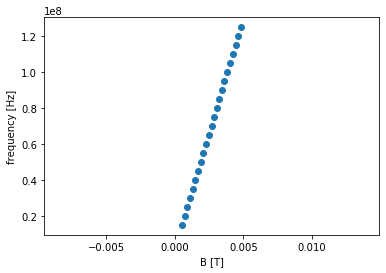

In [2]:
I = np.array([0.25, 0.36, 0.42, 0.53, 0.61, 0.70, 0.80, 0.89, 0.97, 1.08, 1.18, 1.27, 1.35, 1.46, 1.53, 1.61, 
              1.71, 1.78, 1.89, 2.01, 2.10, 2.17, 2.28]) / 2
v = np.array([0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60, 0.65, 0.70, 0.75, 0.80, 0.85, 0.90, 
              0.95, 1.00, 1.05, 1.10, 1.15, 1.20, 1.25]) * 10**8
# 1.40 in I discarded

n = 320     # per coil
r = 0.068

constant = const.mu_0 * ((4/5)**(3/2)) * (n/r)
B = [(constant * i) for i in I]

u_B = 9.27400899 * (10**(-24))

reg = linregress(B, v)

g = reg[0] * const.h / u_B
g_err = reg[4] * const.h / u_B
print(g, g_err)

plt.scatter(B, v)
plt.xlabel('B [T]')
plt.ylabel("frequency [Hz]")
plt.show()

In [3]:
v = np.array([50, 40, 60]) * 10**6
dU = np.array([0.4, 0.4, 0.3])           # not precise
I_mod = np.array([0.90, 0.91, 0.89]) / 2
U_mod = np.array([5, 5, 5])

dI = dU / U_mod * I_mod
dB = constant * dI
dB

array([0.00015233, 0.00015402, 0.00011298])

In [27]:
I = [3.1, 3.2, 3.3, 3.4, 3.5, 3.6]
def g_factor(B, v):
    X = np.array(B).reshape(-1, 1)
    Y = np.array(v).reshape(-1, 1)
    u_N = 5.051 * (10**(-27))
    reg = LinearRegression().fit(X, Y)
    intercept = reg.intercept_
    coef = reg.coef_
    reg_value = reg.score(X, Y)
    return (coef[0,0] * const.h) / u_N

In [43]:
B = np.array([250, 254.4, 258.8, 263.1, 268.2, 272.0])*(10**(-3))
B = np.array([0.403, 0.412, 0.420, 0.426, 0.433, 0.439])
# at 0A, B = -0.5 mT
#theoretical values
g_fact_polystyrene = 5.5857
g_fact_glycerin = 5.5857
g_fact_PTFE = 5.2567

In [44]:
#polystyrene
v = np.array([17.4150, 17.8101, 18.1753, 18.4439, 18.7472, 18.7658])*(10**(6))
g_fact = g_factor(B, v)
err = (np.abs(g_fact - g_fact_polystyrene)/(g_fact_polystyrene))
print(g_fact, err)

5.22042171589923 0.0653952564764972


In [45]:
#glycerin
v = np.array([17.5981, 17.8879, 18.2180, 18.4929, 18.8026, 19.1102])*(10**6)
# v_ii = np.array([17.499, 17.867, 18.249, 18.537, 18.801, 19.053])*(10**6)
g_fact = g_factor(B, v)
err = (np.abs(g_fact - g_fact_glycerin)/(g_fact_glycerin))
print(g_fact, err)

5.543287337163829 0.007593079262432891


In [46]:
#PTFE
v = np.array([16.4224, 16.7308, 17.2593, 17.5011, 17.7050, 17.9865])*(10**6)
g_fact = g_factor(B, v)
err = (np.abs(g_fact - g_fact_PTFE)/(g_fact_PTFE))
print(g_fact, err)

5.803508928651481 0.10402133061644768


In [47]:
#plant
v = np.array([17.55, 17.86, 18.16, 18.51, 18.78, 19.08])*(10**6)
g_fact = g_factor(B, v)
err = (np.abs(g_fact - g_fact_PTFE)/(g_fact_PTFE))
print(g_fact, err)

5.6380608526722495 0.0725475778857932
